#2 Layer Binary Cat Classifier from .h5 training files  

In [ ]:
import h5py
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers


filename = 'train_catvnoncat.h5'
f = h5py.File(filename, 'r')

In [ ]:
list(f.keys())

['list_classes', 'train_set_x', 'train_set_y']

In [ ]:
data = list(f['train_set_x'])
data

[array([[[17, 31, 56],
         [22, 33, 59],
         [25, 35, 62],
         ...,
         [ 1, 28, 57],
         [ 1, 26, 56],
         [ 1, 22, 51]],
 
        [[25, 36, 62],
         [28, 38, 64],
         [30, 40, 67],
         ...,
         [ 1, 27, 56],
         [ 1, 25, 55],
         [ 2, 21, 51]],
 
        [[32, 40, 67],
         [34, 42, 69],
         [35, 42, 70],
         ...,
         [ 1, 25, 55],
         [ 0, 24, 54],
         [ 1, 21, 51]],
 
        ...,
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]]], dtype=uint8), array([[[196, 192, 190],
         [193, 18

In [ ]:
import numpy as np
X_train=np.array(data)

(64, 64, 3)


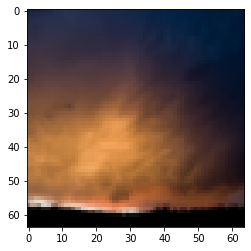

(64, 64, 3)


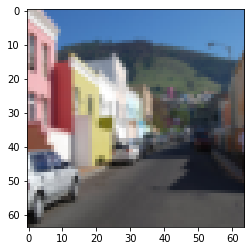

(64, 64, 3)


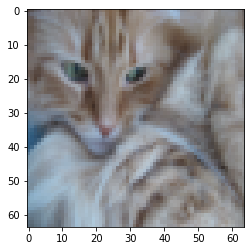

(64, 64, 3)


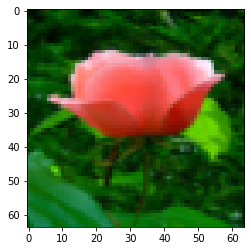

(64, 64, 3)


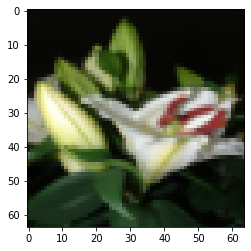

In [ ]:
import matplotlib.pyplot as plt
for i in range(5):   #printing first 5 images in the training data
    print(data[i].shape)
    plt.imshow(data[i])
    plt.show()

In [ ]:
len(data) #number of instances in training data

209

In [ ]:
y_train= np.array(list(f['train_set_y']))
y_train

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val = train_test_split(X_train,y_train,test_size = 0.1)

In [ ]:
print("training size",len(X_train))
print("validation size",len(X_val))

training size 188
validation size 21


In [ ]:
#initializing model

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(64,64,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 128)        

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adagrad',metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train,validation_data = (X_val, Y_val),epochs=100, batch_size=16)

Epoch 1/100
12/12 [==============================] - 2s 132ms/step - loss: 7.3187 - accuracy: 0.5229 - val_loss: 0.7840 - val_accuracy: 0.6190
Epoch 2/100
12/12 [==============================] - 1s 114ms/step - loss: 1.2309 - accuracy: 0.5903 - val_loss: 0.4488 - val_accuracy: 0.8571
Epoch 3/100
12/12 [==============================] - 1s 117ms/step - loss: 0.8039 - accuracy: 0.5841 - val_loss: 0.4092 - val_accuracy: 0.7619
Epoch 4/100
12/12 [==============================] - 1s 116ms/step - loss: 0.8108 - accuracy: 0.6289 - val_loss: 0.3740 - val_accuracy: 0.8571
Epoch 5/100
12/12 [==============================] - 1s 116ms/step - loss: 0.4947 - accuracy: 0.7186 - val_loss: 0.5893 - val_accuracy: 0.6667
Epoch 6/100
12/12 [==============================] - 1s 115ms/step - loss: 0.5521 - accuracy: 0.7255 - val_loss: 0.5049 - val_accuracy: 0.7143
Epoch 7/100
12/12 [==============================] - 1s 116ms/step - loss: 0.5005 - accuracy: 0.7936 - val_loss: 0.4526 - val_accuracy: 0.7143

##saving the model1

In [ ]:
model.save_weights('model1_wieghts.h5')
model.save('model1_keras.h5')

In [ ]:
file = 'test_catvnoncat.h5'
fil = h5py.File(file, 'r')
group_key = list(fil.keys())
group_key

['list_classes', 'test_set_x', 'test_set_y']

In [ ]:
test1=np.array(fil['test_set_x'])
len(test1)

50

In [ ]:
pred = model.predict(test1)

preds= []
for i in pred:
    if i>=0.5:
        preds.append(1)
    else:
        preds.append(0)

In [ ]:
test_y=np.array(fil['test_set_y'])
test_y=test_y.tolist()
test_y

[1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0]

In [ ]:
accuracy = len([preds[i] for i in range(0, len(preds)) if preds[i] == test_y[i]]) / len(preds)
print(accuracy)  # =>80% accurate

0.84


#Model2 training => 2 layers

In [ ]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(64,64,3),use_bias=False))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(64, (3,3), activation = 'relu',use_bias=False))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(128, (3,3), activation = 'relu',use_bias=False))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(128, (3,3), activation = 'relu',use_bias=False))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.BatchNormalization())
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(512,activation='relu',use_bias=False))
model2.add(layers.BatchNormalization())
model2.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
model2.compile(loss='binary_crossentropy',optimizer='adagrad',metrics=['accuracy'])
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 62, 62, 32)        864       
_________________________________________________________________
batch_normalization_9 (Batch (None, 62, 62, 32)        128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 31, 31, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 29, 29, 64)        18432     
_________________________________________________________________
batch_normalization_11 (Batc (None, 29, 29, 64)        256       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 64)       

In [ ]:
model2.fit(X_train, Y_train,validation_data = (X_val, Y_val),epochs=100, batch_size=16)

Epoch 1/100
12/12 [==============================] - 3s 178ms/step - loss: 0.8609 - accuracy: 0.5320 - val_loss: 0.6481 - val_accuracy: 0.7143
Epoch 2/100
12/12 [==============================] - 2s 149ms/step - loss: 0.5715 - accuracy: 0.6900 - val_loss: 0.5555 - val_accuracy: 0.7143
Epoch 3/100
12/12 [==============================] - 2s 152ms/step - loss: 0.4968 - accuracy: 0.7343 - val_loss: 0.4931 - val_accuracy: 0.7619
Epoch 4/100
12/12 [==============================] - 2s 154ms/step - loss: 0.5757 - accuracy: 0.7347 - val_loss: 0.4851 - val_accuracy: 0.7619
Epoch 5/100
12/12 [==============================] - 2s 153ms/step - loss: 0.3628 - accuracy: 0.8569 - val_loss: 0.5036 - val_accuracy: 0.6667
Epoch 6/100
12/12 [==============================] - 2s 147ms/step - loss: 0.3798 - accuracy: 0.8348 - val_loss: 0.5119 - val_accuracy: 0.6667
Epoch 7/100
12/12 [==============================] - 2s 151ms/step - loss: 0.3203 - accuracy: 0.8757 - val_loss: 0.5145 - val_accuracy: 0.7143

##testing with model2 => 2 layers

In [ ]:
pred2 = model2.predict(test1)

In [ ]:
preds2= []
for i in pred:
    if i>=0.5:
        preds2.append(1)
    else:
        preds2.append(0)

In [ ]:
sum(preds2)/sum(test_y)  # accuracy => 87%

0.8787878787878788